 # Predicting Liver Disease Using Logistic Regression, Random Forest, and Decision Tree

# Problem Statement
Using the provided dataset, we need to predict whether a patient has liver disease or not based on various medical features. Our goal is to identify the key features that can help make accurate predictions.

# Overeview

1. age:The chronological age of the patient.
gender:
2. Gender refer to the sex.
3. Total_Bilirubin: this is the fers to the level of total bilirubin in the blood. Normal range is 0.2 to 1.2 mg/dL. Anything above 1.2 mg/dL is usually considered elevated. A total bilirubin level > 17.5 mg/dL is a criterion for predicting death and the need for liver transplantation.
4. Direct_Bilirubin: refers to the level of direct bilirubin in the blood.
5. Alkaline_Phosphotase:  refers to the level of alkaline phosphotase in the blood.
6. Alamine_Aminotransferase: refers to the level of alanine aminotransferase in the blood.
7. Aspartate_Aminotransferase: refers to the level of aspartate aminotransferase in the blood.
8. Total_Protiens: refers to the level of total proteins in the blood.

9. Albumin:refers to the level of albumin in the blood.

10. Albumin_Globulin_Ratio: refers to the value of albumin-globulin ratio.
11. Dataset: it represent the target value, there are two numbers Target = 1: This means the patient has liver disease.
Target = 2: This means the patient does not have liver disease.




In [70]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading  the data
df= pd.read_csv('/content/indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Task1:  Basic Checks

In [3]:

df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64



# Task 2: Data Visulization and analysis


```



# Univariate Analysis

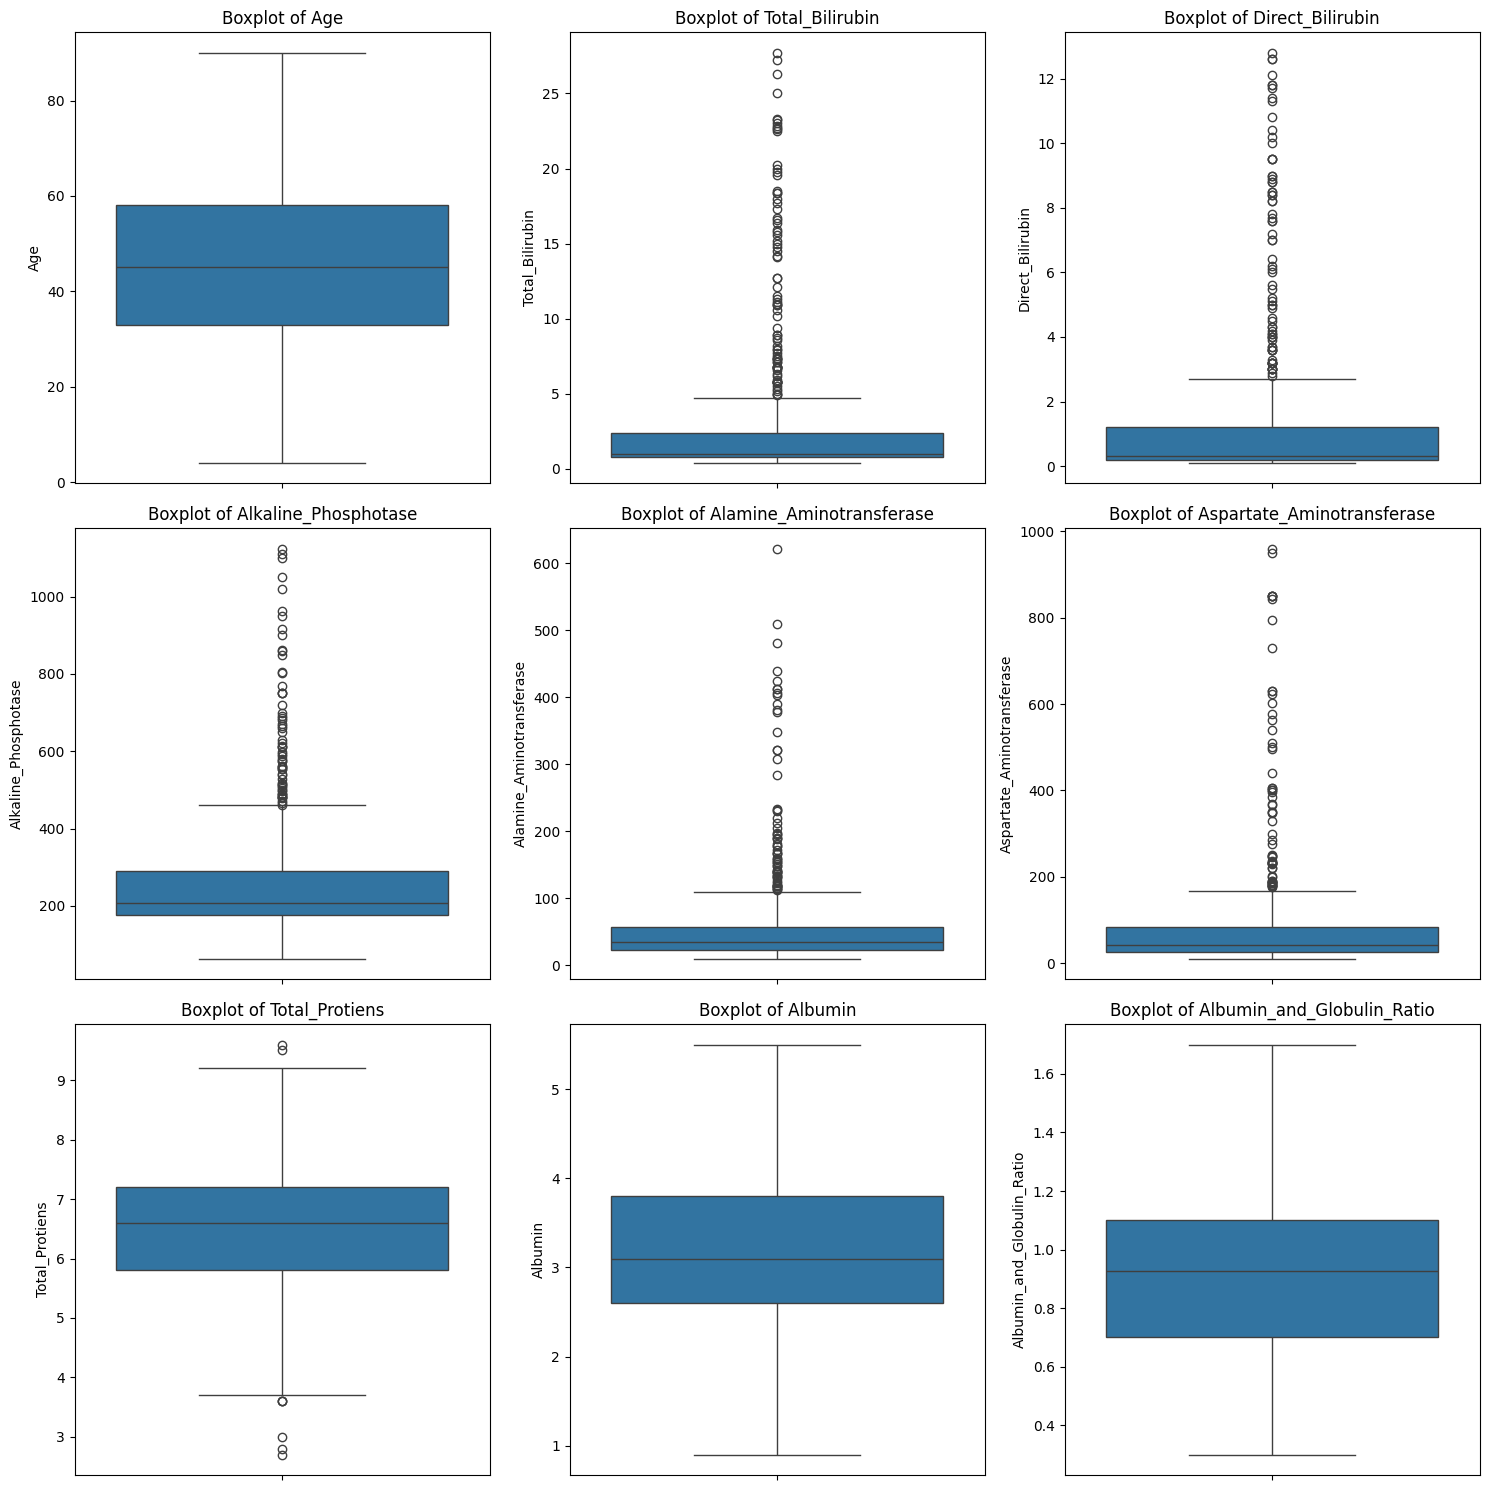

In [82]:
plt.figure(figsize=(15, 15))


plt_num = 1

# Separate numerical features (exclude 'Gender' and 'Target')
liver_df_num = df.drop(["Gender", "Dataset"], axis=1)

# Loop through the numerical columns to create boxplots
for column in liver_df_num.columns:
    if plt_num <= 9:
        plt.subplot(3, 3, plt_num)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column}')
    plt_num += 1

plt.tight_layout()

As form above boxplots we are noticing outliters are present in Albumin, age and Albumin_and Globulin_Ratio. I have to control these ouliters by replaing median in our data as these graph not showing normal distribution.

In [13]:
# here vanishing the outliters
# total_BILIRUBIN

df.loc[df['Total_Bilirubin']>30, 'Total_Bilirubin']= np.median(df["Total_Bilirubin"])


In [12]:
# DIRECT blueribion
df.loc[df['Direct_Bilirubin']>13, 'Direct_Bilirubin']= np.median(df["Direct_Bilirubin"])

In [11]:
#Alkaline _phosphate
df.loc[df['Alkaline_Phosphotase']>1200, 'Alkaline_Phosphotase']= np.median(df["Alkaline_Phosphotase"])


In [14]:
# alumnin_aminophasptae
df.loc[df['Alamine_Aminotransferase']>750, 'Alamine_Aminotransferase']= np.median(df["Alamine_Aminotransferase"])


In [15]:
#Aspirate_Amino
df.loc[df['Aspartate_Aminotransferase']>1000, 'Aspartate_Aminotransferase']= np.median(df["Aspartate_Aminotransferase"])


In [16]:
#Albumin and glubin ratio
df.loc[df['Albumin_and_Globulin_Ratio']>1.7, 'Albumin_and_Globulin_Ratio']= np.median(df["Albumin_and_Globulin_Ratio"])


# Multivariate Analysis

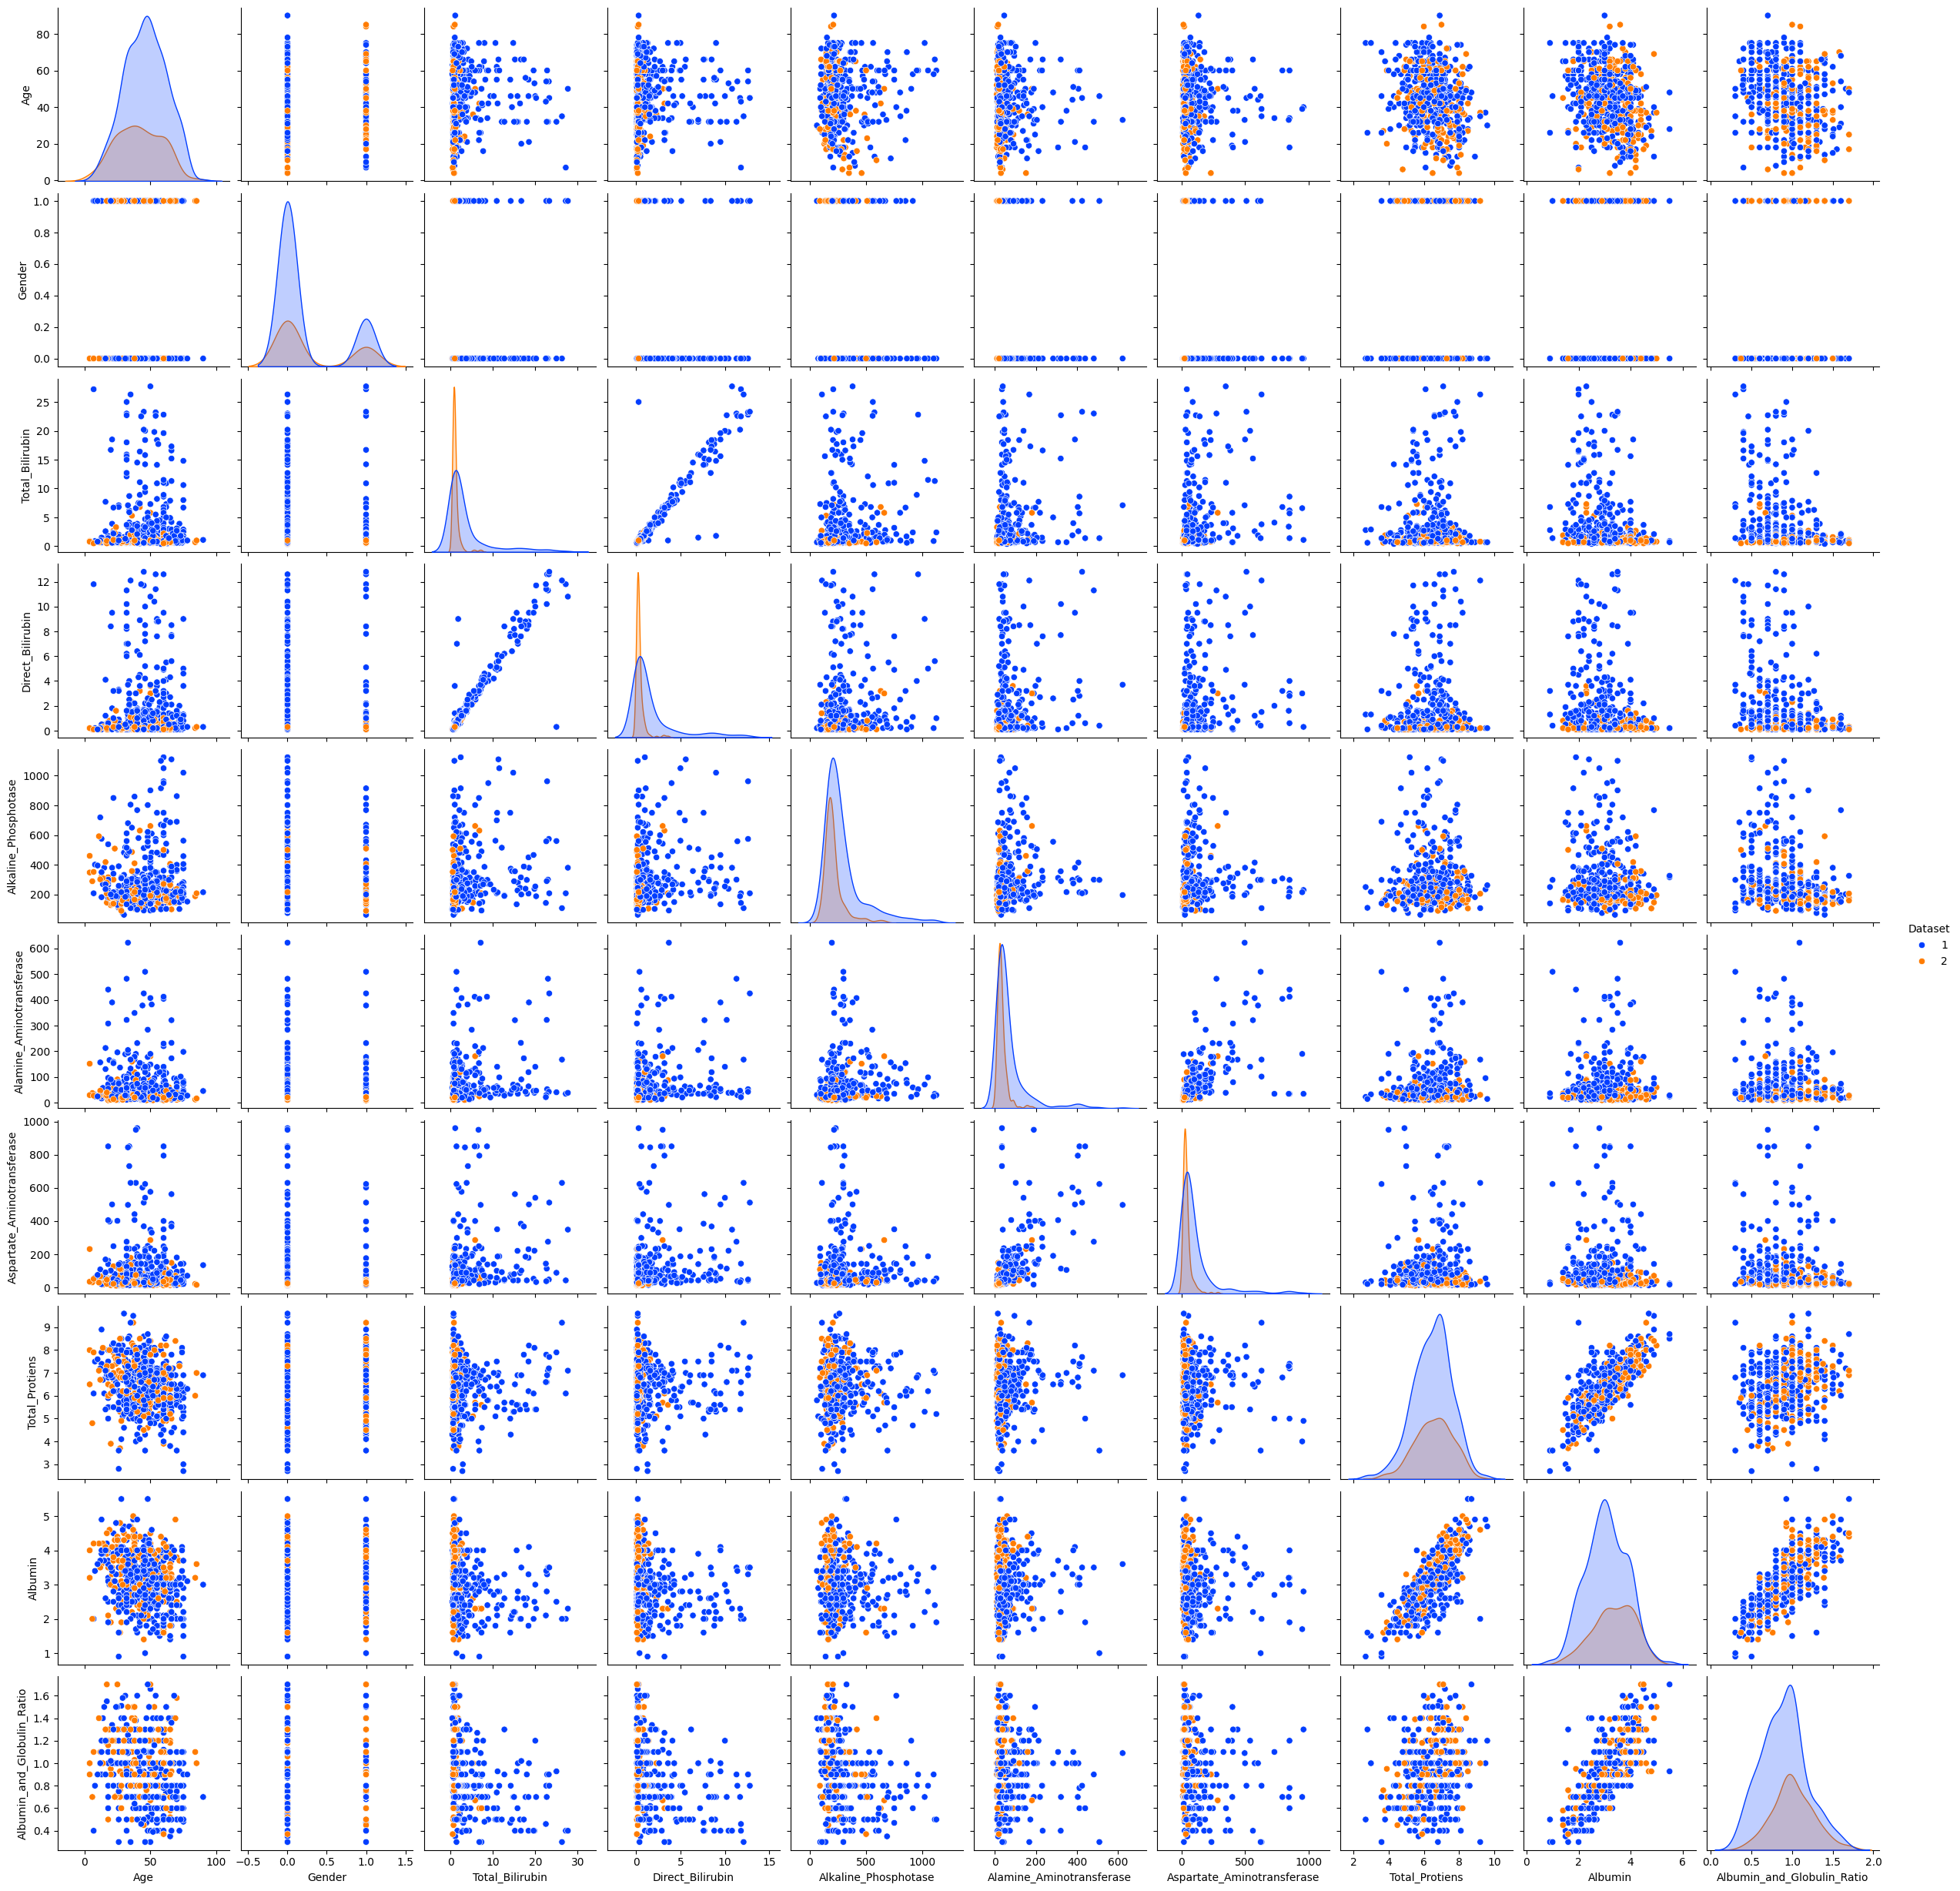

In [83]:
sns.pairplot(df, hue='Dataset', palette="bright")

1. Age does not exhibit a significant correlation with liver disease. It shows taht wheather person is old or young its not  other liver function indicators in the pair plot.
 2.  there is a clear positive correlation, where higher Direct Bilirubin corresponds to higher Total Bilirubin. This indicates a strong direct relationship between the two. and  similarly total_Bilirubin had positive corelation with direct Bilirubin.
  3. Any feature plotted against (especially)Bilirubin(Total or Direct) shows a likelihood of liver disease when there is an increase in their value beyond the normal range
  4. An increase in Total_Proteins and Albumin vs Albumin_Globulin_Ratio shows random/mixed values of patients containing liver diesease or not



# TASK3: Data preprocessing

In [22]:
# missing values
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [84]:
# filling missing vales
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)


In [21]:
# drop duplicates
df.duplicated().sum()


13

In [24]:
# drop duplicates
drop_duplicates(inplace=True)

# Converting categorical values in to numerical values

In [25]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Task4: Dimension reduction

In [85]:
#1. Spliting the X AND y
X= df.drop('Dataset', axis=1)
X
y= df['Dataset']

In [86]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [87]:

#2. Scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1= sc.fit_transform(X)
df1




array([[ 1.24174059,  1.75254916, -0.47130969, ...,  0.27928958,
         0.18973749, -0.10132209],
       [ 1.0568741 , -0.5705974 ,  1.70655912, ...,  0.92305933,
         0.06412731, -0.67752444],
       [ 1.0568741 , -0.5705974 ,  0.93789954, ...,  0.4632238 ,
         0.18973749, -0.13733473],
       ...,
       [ 0.4406525 , -0.5705974 , -0.44995804, ..., -0.08857885,
         0.06412731,  0.25880438],
       [-0.85341287, -0.5705974 , -0.34319976, ...,  0.27928958,
         0.31534768,  0.25880438],
       [-0.42205774, -0.5705974 , -0.40725473, ...,  0.73912512,
         1.57144955,  2.05943675]])

In [88]:
#change array to Dataframe
df1=pd.DataFrame(df1, columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                                       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
                                       'Total_Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Gender'])
df1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Gender
0,1.241741,1.752549,-0.471310,-0.516532,-0.482292,-0.572955,-0.503181,0.279290,0.189737,-0.101322
1,1.056874,-0.570597,1.706559,1.750523,2.608989,0.076937,0.095807,0.923059,0.064127,-0.677524
2,1.056874,-0.570597,0.937900,1.162768,1.347118,0.022779,-0.137944,0.463224,0.189737,-0.137335
3,0.810385,-0.570597,-0.407255,-0.390585,-0.512481,-0.600034,-0.488572,0.279290,0.315348,0.258804
4,1.673096,-0.570597,0.211943,0.281136,-0.433991,-0.424021,-0.203687,0.739125,-0.940754,-1.901954
...,...,...,...,...,...,...,...,...,...,...
565,0.933630,-0.570597,-0.514013,-0.516532,1.407495,-0.518797,-0.386305,-0.548414,-1.945636,-2.009992
566,-0.298813,-0.570597,-0.492661,-0.516532,-1.019644,-0.315706,-0.408220,-0.456447,0.064127,0.618931
567,0.440653,-0.570597,-0.449958,-0.474550,-0.132108,-0.139694,-0.276734,-0.088579,0.064127,0.258804
568,-0.853413,-0.570597,-0.343200,-0.348602,-0.500405,-0.396942,-0.400915,0.279290,0.315348,0.258804


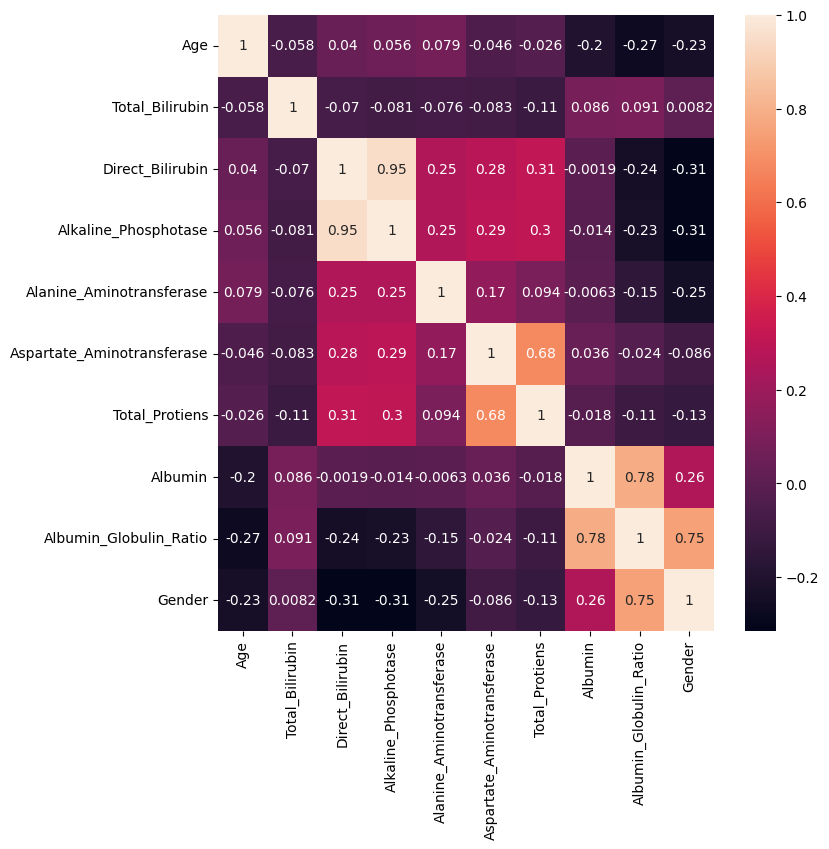

In [89]:
# FEATURES SELECTION VIS CORRELATION
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [90]:
# counting the target variable
df['Dataset'].value_counts()

,count
Dataset,
1,406
2,164


<Axes: xlabel='Dataset'>

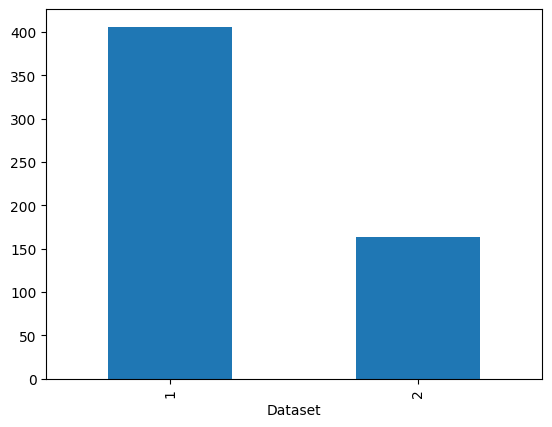

In [91]:
df['Dataset'].value_counts().plot(kind='bar')

In [92]:
# test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancing the data
I apply here SMOTE to balance the dataset, ensuring the model can learn from both classes effectively, leading to better prediction performance.



In [93]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [94]:


y_train_smote.value_counts()

,count
Dataset,
1,321
2,321


In [95]:
X_train.shape, X_test.shape

((456, 10), (114, 10))

In [96]:
y_train.shape, y_test.shape

((456,), (114,))

# Task5:  ML Algorithm

# 5.1: Logistic Regression

In [41]:
# First check it logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1500)
#LR = LogisticRegression()
LR.fit(X_train_smote, y_train_smote)
y_pred_LR = LR.predict(X_test)
y_pred_LR






array([1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 2])

In [42]:
y_test

,Dataset
520,1
75,2
139,1
413,2
554,1
...,...
212,2
80,1
262,1
434,2


In [43]:
# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_LR)

0.631578947368421

#Model Evaluation

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           1       0.91      0.56      0.70        85
           2       0.39      0.83      0.53        29

    accuracy                           0.63       114
   macro avg       0.65      0.70      0.61       114
weighted avg       0.78      0.63      0.65       114



# 5.2: Random Forest

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test)
y_pred_dt


array([1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 2])

In [56]:
# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred_dt)

0.6052631578947368

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.77      0.67      0.72        85
           2       0.30      0.41      0.35        29

    accuracy                           0.61       114
   macro avg       0.54      0.54      0.53       114
weighted avg       0.65      0.61      0.62       114



# Setting the hyperparameter for improving the score

In [58]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"), # searches the features for a s
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 5)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

tree_clf = DecisionTreeClassifier(random_state=42)                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=3, cv=5)
tree_cv.fit(X_train_smote,y_train_smote)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params})")
print(tree_cv.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best paramters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'best'})
0.6955852944768848


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Best parameters obtained from GridSearchCV
best_params = {
    'criterion': 'gini',
    'max_depth': 9,
    'min_samples_leaf': 2,
    'min_samples_split': 6,
    'splitter': 'best'
}

# Initialize the model with the best parameters
final_model = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
final_model.fit(X_train_smote, y_train_smote)
y_pred = final_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[54 31]
 [16 13]]

Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.64      0.70        85
           2       0.30      0.45      0.36        29

    accuracy                           0.59       114
   macro avg       0.53      0.54      0.53       114
weighted avg       0.65      0.59      0.61       114



# 5.3: Random forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
forest_cl = RandomForestClassifier(random_state=42)
forest_cl.fit(X_train_smote, y_train_smote)

from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV instead of GridSearchCV
forest_cv = RandomizedSearchCV(estimator=forest_cl, scoring='f1',
                               param_distributions=rand_frst_parm_grid,
                               n_iter=100,
                               cv=3, verbose=3, n_jobs=-1, random_state=42)

# Fit the model
forest_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 10, 10, 11, 11, 12,
                                                      12, 12, 13, 13, 14, 14,
                                                      14, 15, 15, 16, 16, 16,
                                                      17, 17, 18, 18, 18, 19,
                                                      19, 20, 20, 21, 21, 21, ...],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [50, 49, 48, 47, 46, 45,
                                                         45, 44, 43, 42, 41, 41,
                                                         40, 39, 38, 37, 36, 36,
                                                         35, 34, 33, 32, 32, 31,
                                                         30, 29, 28, 27, 27, 26, ...]},
                   random_state=42, scoring='f1', verbose=3)

In [75]:
y_pred_rf = forest_cv.predict(X_test)
y_pred_rf

array([1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 2])

In [77]:
accuracy_score= accuracy_score(y_test, y_pred_rf)
accuracy_score

0.7017543859649122

# Evaluation the model

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.86      0.72      0.78        85
           2       0.44      0.66      0.53        29

    accuracy                           0.70       114
   macro avg       0.65      0.69      0.65       114
weighted avg       0.75      0.70      0.72       114



# Conclusion
In this analysis of medical data to predict liver disease, I applied three machine learning algorithms—Logistic Regression, Decision Trees, and Random Forest. After addressing outliers and employing techniques like SMOTE for class balancing, the Random Forest model achieved the highest f1- scoreof 72%. predict liver disease based on various clinical features.
To improve the accuracy of the liver disease prediction model we can focus on more implementation feature engineering, incorporate additional relevant features, and optimize hyperparameters through grid search.